<a href="https://colab.research.google.com/github/nksgbc/exchangerate/blob/main/Time_series_analysis_AR%2C_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/summer project/Colab Notebooks/TSA - Sheet1.csv")

In [ ]:
df.head()

,Date,Price,Open,High,Low,Chg%
0,"Jul 14, 2022",79.89,79.708,80.235,79.666,0.30%
1,"Jul 13, 2022",79.65,79.490,79.870,79.475,0.25%
2,"Jul 12, 2022",79.45,79.466,79.666,79.459,0.05%
3,"Jul 11, 2022",79.41,79.255,79.585,79.255,0.19%
4,"Jul 08, 2022",79.26,79.180,79.435,79.128,0.14%


In [ ]:
df.tail(10)

,Date,Price,Open,High,Low,Chg%
2999,"Jan 14, 2011",45.365,45.095,45.465,44.985,0.51%
3000,"Jan 13, 2011",45.135,45.145,45.285,44.905,0.26%
3001,"Jan 12, 2011",45.020,45.100,45.225,45.020,-0.30%
3002,"Jan 11, 2011",45.155,45.470,45.470,45.075,-0.43%
3003,"Jan 10, 2011",45.350,45.290,45.570,45.235,-0.01%
3004,"Jan 07, 2011",45.355,45.255,45.535,45.135,0.00%
3005,"Jan 06, 2011",45.355,45.347,45.450,45.115,0.07%
3006,"Jan 05, 2011",45.325,45.005,45.465,44.905,0.90%
3007,"Jan 04, 2011",44.920,44.610,45.110,44.530,0.66%
3008,"Jan 03, 2011",44.625,44.635,44.805,44.575,-0.20%


In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%b %d, %Y')
df.index = df['Date']
df = df.sort_index(ascending=True, axis=0)

In [ ]:
df.describe()

,Price,Open,High,Low
count,3009.000000,3009.000000,3009.000000,3009.000000
mean,64.486662,64.478871,64.664643,64.321961
std,8.604105,8.612133,8.601102,8.612878
min,44.070000,44.010000,44.108000,43.855000
25%,60.345000,60.325000,60.515000,60.235000
50%,65.517000,65.524000,65.700000,65.400000
75%,71.340000,71.360000,71.505000,71.225000
max,79.890000,79.708000,80.235000,79.666000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3009 entries, 2011-01-03 to 2022-07-14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3009 non-null   datetime64[ns]
 1   Price   3009 non-null   float64       
 2   Open    3009 non-null   float64       
 3   High    3009 non-null   float64       
 4   Low     3009 non-null   float64       
 5   Chg%    3009 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 164.6+ KB


In [ ]:
df.head()

,Date,Price,Open,High,Low,Chg%
Date,,,,,,
2011-01-03,2011-01-03,44.625,44.635,44.805,44.575,-0.20%
2011-01-04,2011-01-04,44.920,44.610,45.110,44.530,0.66%
2011-01-05,2011-01-05,45.325,45.005,45.465,44.905,0.90%
2011-01-06,2011-01-06,45.355,45.347,45.450,45.115,0.07%
2011-01-07,2011-01-07,45.355,45.255,45.535,45.135,0.00%


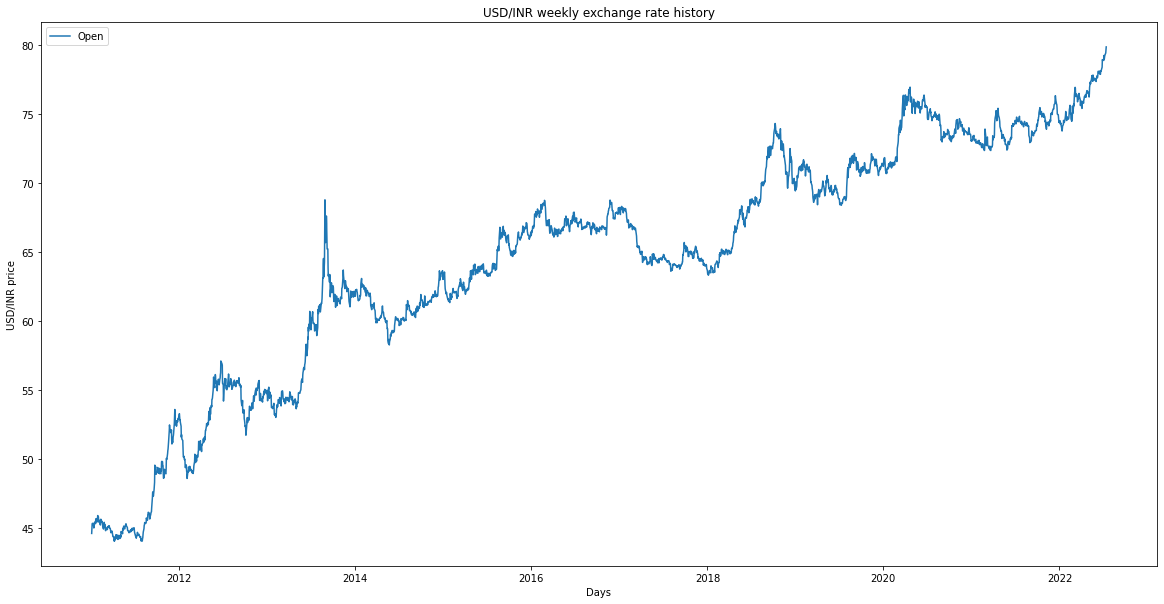

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df["Price"])
plt.title('USD/INR weekly exchange rate history')
plt.ylabel('USD/INR price')
plt.xlabel('Days')
plt.legend(['Open'], loc='upper left')
plt.show()


**QQ plot**

In [ ]:
import scipy.stats
import pylab

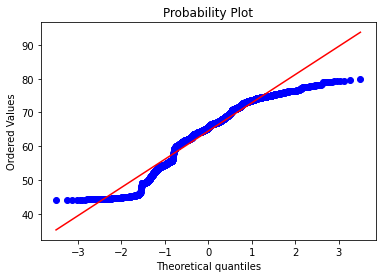

In [ ]:
scipy.stats.probplot(df["Price"], plot=pylab)
pylab.show()

In [ ]:
df=df.asfreq('b')
df.head(10)

,Date,Price,Open,High,Low,Chg%
Date,,,,,,
2011-01-03,2011-01-03,44.625,44.635,44.805,44.575,-0.20%
2011-01-04,2011-01-04,44.920,44.610,45.110,44.530,0.66%
2011-01-05,2011-01-05,45.325,45.005,45.465,44.905,0.90%
2011-01-06,2011-01-06,45.355,45.347,45.450,45.115,0.07%
2011-01-07,2011-01-07,45.355,45.255,45.535,45.135,0.00%
2011-01-10,2011-01-10,45.350,45.290,45.570,45.235,-0.01%
2011-01-11,2011-01-11,45.155,45.470,45.470,45.075,-0.43%
2011-01-12,2011-01-12,45.020,45.100,45.225,45.020,-0.30%
2011-01-13,2011-01-13,45.135,45.145,45.285,44.905,0.26%


In [ ]:
df.isna().sum()

Date     0
Price    0
Open     0
High     0
Low      0
Chg%     0
dtype: int64

In [ ]:
usd_inr=df[["Date", "Price"]]
usd_inr.head()

,Date,Price
Date,,
2011-01-03,2011-01-03,44.625
2011-01-04,2011-01-04,44.920
2011-01-05,2011-01-05,45.325
2011-01-06,2011-01-06,45.355
2011-01-07,2011-01-07,45.355


In [ ]:
del df["Date"]

In [ ]:
df.head()

,Price,Open,High,Low,Chg%
Date,,,,,
2011-01-03,44.625,44.635,44.805,44.575,-0.20%
2011-01-04,44.920,44.610,45.110,44.530,0.66%
2011-01-05,45.325,45.005,45.465,44.905,0.90%
2011-01-06,45.355,45.347,45.450,45.115,0.07%
2011-01-07,45.355,45.255,45.535,45.135,0.00%


In [ ]:
#split into 80% train and 20% test data
train_size=int(len(usd_inr)*0.8)
train_size

2407

In [ ]:
df_train = usd_inr.iloc[:train_size]
df_test = usd_inr.iloc[train_size:]

In [ ]:
df_train.tail()

,Date,Price
Date,,
2020-03-18,2020-03-18,74.550
2020-03-19,2020-03-19,74.786
2020-03-20,2020-03-20,75.399
2020-03-23,2020-03-23,76.335
2020-03-24,2020-03-24,76.379


In [ ]:
df_test.head()

,Date,Price
Date,,
2020-03-25,2020-03-25,76.375
2020-03-26,2020-03-26,74.889
2020-03-27,2020-03-27,75.472
2020-03-30,2020-03-30,75.410
2020-03-31,2020-03-31,75.343


White Noise

In [ ]:
import numpy as np
wn=np.random.normal(loc=df_train.Price.mean(), scale=df_train.Price.std(), size=len(df_train))

In [ ]:
df_train["wn"]=wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.describe()

,Price,wn
count,2407.000000,2407.000000
mean,61.916204,62.145046
std,7.679212,7.866375
min,44.070000,34.392067
25%,55.712500,56.817490
50%,63.947000,62.122998
75%,67.314000,67.459828
max,76.379000,86.120284


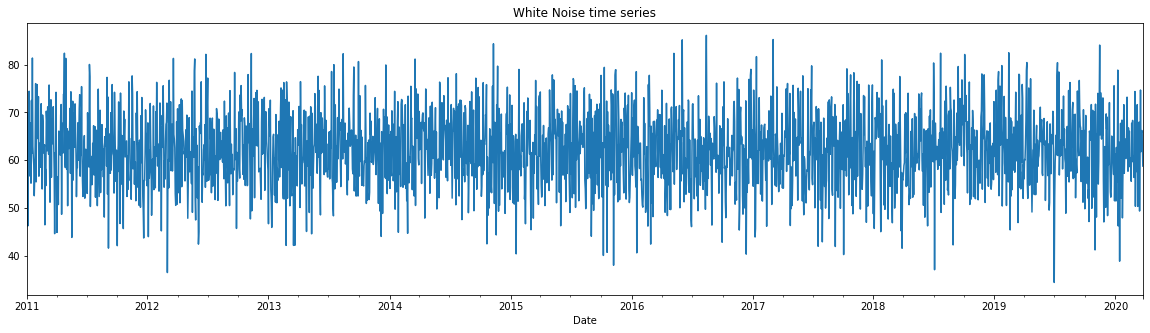

In [ ]:
df_train.wn.plot(title="White Noise time series", figsize=(20,5))

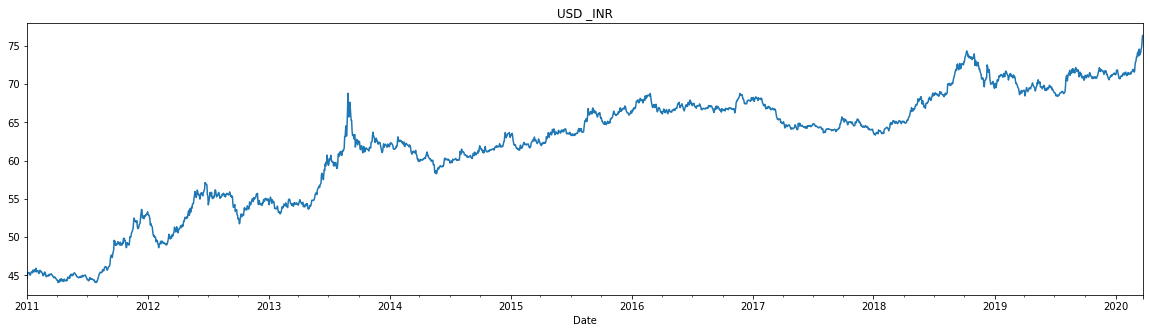

In [ ]:
df_train.Price.plot(title="USD _INR", figsize=(20,5))

Random Walk

In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

In [ ]:
steps=np.random.standard_normal( size=len(df_train))
steps[0]=df_train.Price[0]

random_walk=np.cumsum(steps)

In [ ]:
random_walk[:10]

array([44.625     , 46.18920839, 47.4507232 , 48.34666138, 47.36604174,
       48.62855452, 46.60096006, 45.72479661, 44.9888287 , 43.35141011])

In [ ]:
df_train["rw"]=random_walk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.describe()

,Price,wn,rw
count,2407.000000,2407.000000,2407.000000
mean,61.916204,62.145046,71.439018
std,7.679212,7.866375,21.504677
min,44.070000,34.392067,30.161909
25%,55.712500,56.817490,58.244121
50%,63.947000,62.122998,65.678689
75%,67.314000,67.459828,84.023026
max,76.379000,86.120284,130.311457


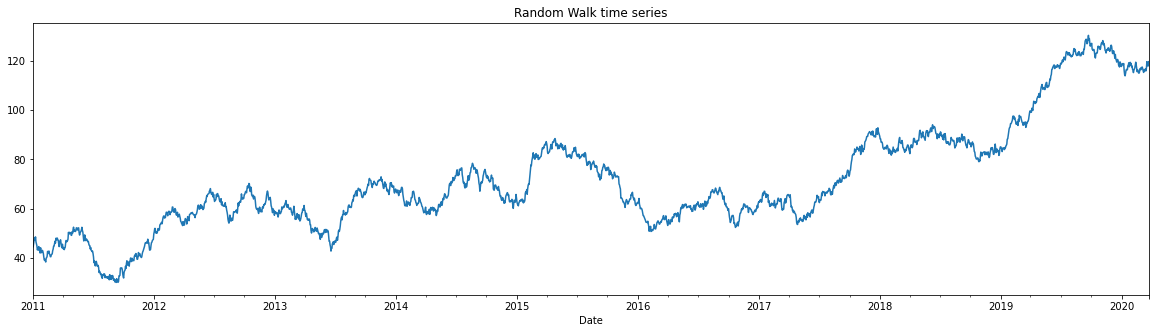

In [ ]:
df_train.rw.plot(title="Random Walk time series", figsize=(20,5))

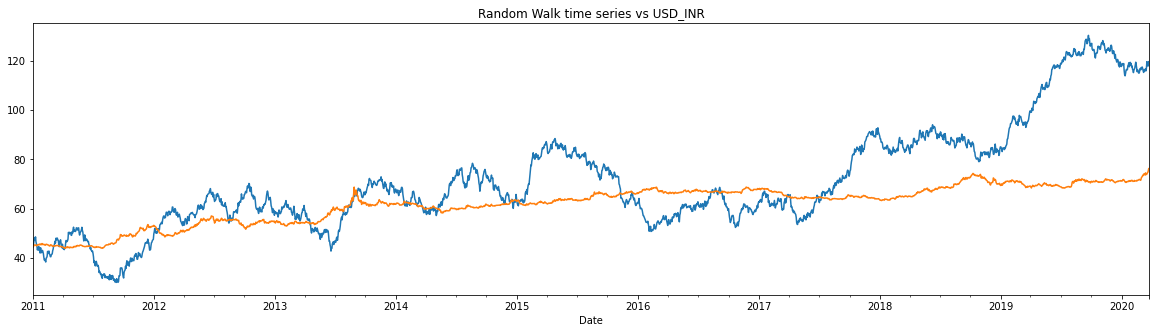

In [ ]:
rand_walk=df_train.rw.plot(title="Random Walk time series vs USD_INR", figsize=(20,5))
price=df_train.Price.plot()


Stationarity


In [ ]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df_train.Price)

(-1.2045107039639098,
 0.6716523171614209,
 5,
 2401,
 {'1%': -3.43307649105898,
  '10%': -2.567411220295375,
  '5%': -2.8627445274375276},
 656.0629365010664)

In [ ]:
sts.adfuller(df_train.wn)

(-26.39632595276734,
 0.0,
 3,
 2403,
 {'1%': -3.4330742193886445,
  '10%': -2.567410686207021,
  '5%': -2.8627435243022283},
 16557.00731915446)

In [ ]:
sts.adfuller(df_train.rw)

(-0.45095170635772935,
 0.9012378214173655,
 0,
 2406,
 {'1%': -3.4330708189719914,
  '10%': -2.567409886740616,
  '5%': -2.862742022728184},
 6737.3483328540715)

Seasonality

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

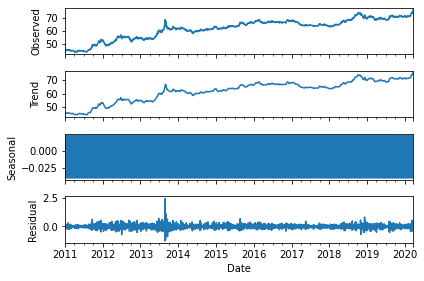

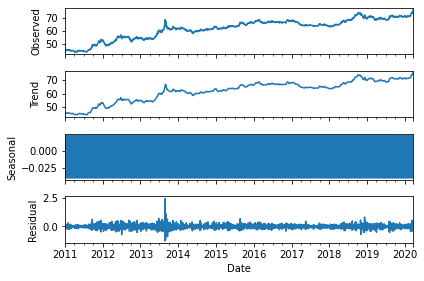

In [ ]:
sea_dec_add=seasonal_decompose(df_train.Price, model="additive")
sea_dec_add.plot()

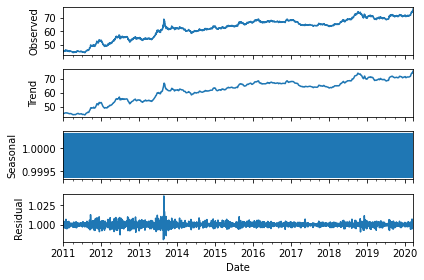

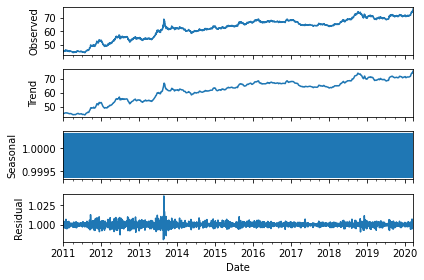

In [ ]:
sea_dec_mul=seasonal_decompose(df_train.Price, model="multiplicative")
sea_dec_mul.plot()

ACF

Text(0.5, 1.0, 'ACF USD_INR')

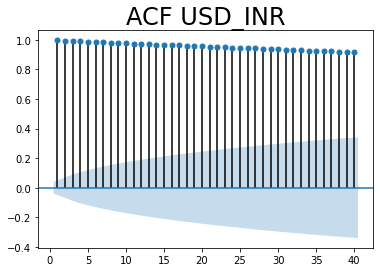

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df_train.Price, lags=40, zero=False)
plt.title("ACF USD_INR", size=24)


Text(0.5, 1.0, 'ACF WN')

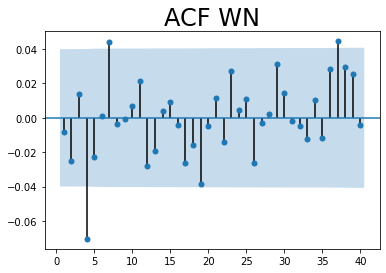

In [ ]:
sgt.plot_acf(df_train.wn, lags=40, zero=False)
plt.title("ACF WN", size=24)


Text(0.5, 1.0, 'ACF RW')

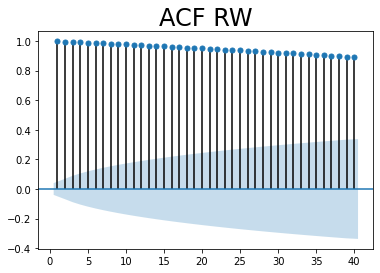

In [ ]:
sgt.plot_acf(df_train.rw, lags=40, zero=False)
plt.title("ACF RW", size=24)

Since we have autocorrelation, it is non stationary. To make it stationary

Text(0.5, 1.0, 'Noise')

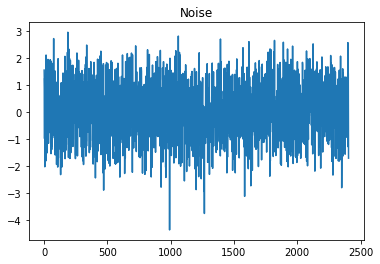

In [ ]:
random_walk_diff=np.diff(random_walk, n=1)
plt.plot(random_walk_diff)
plt.title("Noise")

Text(0.5, 1.0, 'ACF Noise')

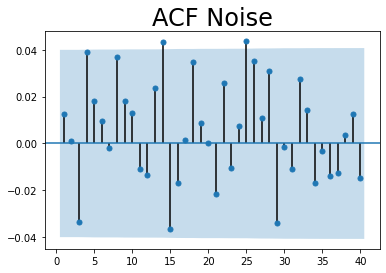

In [ ]:
sgt.plot_acf(random_walk_diff, lags=40, zero=False)
plt.title("ACF Noise", size=24)


PACF

Text(0.5, 1.0, 'PACF USD_INR')

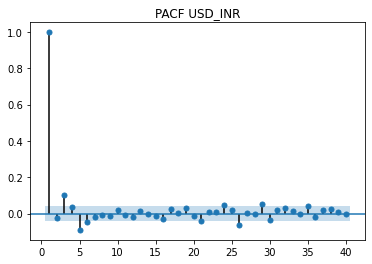

In [ ]:
sgt.plot_pacf(df_train.Price, lags=40, zero=False, method=('ols'))
plt.title("PACF USD_INR")

Text(0.5, 1.0, 'PACF WN')

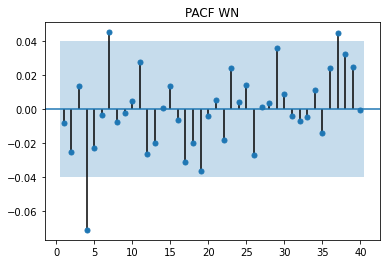

In [ ]:
sgt.plot_pacf(df_train.wn, lags=40, zero=False, method=('ols'))
plt.title("PACF WN")

Text(0.5, 1.0, 'PACF RW')

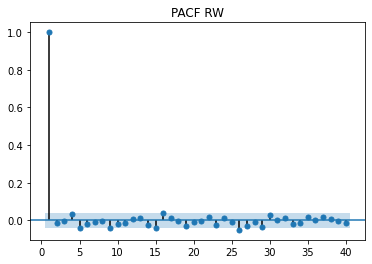

In [ ]:
sgt.plot_pacf(df_train.rw, lags=40, zero=False, method=('ols'))
plt.title("PACF RW")

AR **Model**

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns

**AR(1) Model**

In [ ]:
model_ar_1=ARMA(df_train.Price, order=(1,0))
results_ar_1=model_ar_1.fit()
results_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(1, 0)   Log Likelihood                -352.750
Method:                       css-mle   S.D. of innovations              0.280
Date:                Mon, 15 Aug 2022   AIC                            711.500
Time:                        10:15:14   BIC                            728.858
Sample:                    01-03-2011   HQIC                           717.814
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.7857     12.270      4.954      0.000      36.737      84.835
ar.L1.Price     0.9998      0.000   3659.029      0.000       0.999       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

AR(2) Model

In [ ]:
model_ar_2=ARMA(df_train.Price, order=(2,0))
results_ar_2=model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(2, 0)   Log Likelihood                -351.746
Method:                       css-mle   S.D. of innovations              0.280
Date:                Mon, 15 Aug 2022   AIC                            711.492
Time:                        10:15:15   BIC                            734.637
Sample:                    01-03-2011   HQIC                           719.911
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.7994     12.075      5.035      0.000      37.132      84.467
ar.L1.Price     1.0287      0.007    143.750      0.000       1.015       1.043
ar.L2.Price    -0.0289      0.007     -4.036      0.000      -0.043      -0.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           +0.0000j            1.0002            0.0000
AR.2           34.6081           +0.0000j           34.6081            0.0000
-----------------------------------------------------------------------------
"""

AR(3) Model

In [ ]:
model_ar_3=ARMA(df_train.Price, order=(3,0))
results_ar_3=model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(3, 0)   Log Likelihood                -339.896
Method:                       css-mle   S.D. of innovations              0.278
Date:                Mon, 15 Aug 2022   AIC                            689.793
Time:                        10:15:15   BIC                            718.724
Sample:                    01-03-2011   HQIC                           700.316
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.7371     12.645      4.803      0.000      35.952      85.522
ar.L1.Price     1.0314      0.005    188.941      0.000       1.021       1.042
ar.L2.Price    -0.1309      0.020     -6.454      0.000      -0.171      -0.091
ar.L3.Price     0.0993      0.019      5.092      0.000       0.061       0.137
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2            0.1592           -3.1696j            3.1736           -0.2420
AR.3            0.1592           +3.1696j            3.1736            0.2420
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_4=ARMA(df_train.Price, order=(4,0))
results_ar_4=model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(4, 0)   Log Likelihood                -338.746
Method:                       css-mle   S.D. of innovations              0.278
Date:                Mon, 15 Aug 2022   AIC                            689.493
Time:                        10:15:16   BIC                            724.210
Sample:                    01-03-2011   HQIC                           702.121
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.7133     12.796      4.745      0.000      35.634      85.792
ar.L1.Price     1.0284      0.005    203.501      0.000       1.018       1.038
ar.L2.Price    -0.1270      0.020     -6.299      0.000      -0.166      -0.087
ar.L3.Price     0.0674      0.029      2.365      0.018       0.012       0.123
ar.L4.Price     0.0310      0.020      1.524      0.128      -0.009       0.071
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2            0.8023           -2.4705j            2.5975           -0.2000
AR.3            0.8023           +2.4705j            2.5975            0.2000
AR.4           -4.7778           -0.0000j            4.7778           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_5=ARMA(df_train.Price, order=(5,0))
results_ar_5=model_ar_5.fit()
results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(5, 0)   Log Likelihood                -328.428
Method:                       css-mle   S.D. of innovations              0.277
Date:                Mon, 15 Aug 2022   AIC                            670.857
Time:                        10:15:18   BIC                            711.360
Sample:                    01-03-2011   HQIC                           685.589
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.7983     12.336      4.928      0.000      36.620      84.977
ar.L1.Price     1.0313      0.006    163.302      0.000       1.019       1.044
ar.L2.Price    -0.1206      0.021     -5.753      0.000      -0.162      -0.080
ar.L3.Price     0.0560      0.029      1.915      0.056      -0.001       0.113
ar.L4.Price     0.1259      0.029      4.321      0.000       0.069       0.183
ar.L5.Price    -0.0927      0.020     -4.673      0.000      -0.132      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2           -1.8780           -0.0000j            1.8780           -0.5000
AR.3            0.1016           -1.6776j            1.6806           -0.2404
AR.4            0.1016           +1.6776j            1.6806            0.2404
AR.5            2.0325           -0.0000j            2.0325           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_6=ARMA(df_train.Price, order=(6,0))
results_ar_6=model_ar_6.fit()
results_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(6, 0)   Log Likelihood                -325.763
Method:                       css-mle   S.D. of innovations              0.277
Date:                Mon, 15 Aug 2022   AIC                            667.527
Time:                        10:15:20   BIC                            713.816
Sample:                    01-03-2011   HQIC                           684.364
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.8569     12.087      5.035      0.000      37.167      84.547
ar.L1.Price     1.0269      0.007    144.469      0.000       1.013       1.041
ar.L2.Price    -0.1145      0.021     -5.351      0.000      -0.156      -0.073
ar.L3.Price     0.0586      0.029      2.007      0.045       0.001       0.116
ar.L4.Price     0.1203      0.029      4.122      0.000       0.063       0.178
ar.L5.Price    -0.0443      0.029     -1.533      0.125      -0.101       0.012
ar.L6.Price    -0.0472      0.020     -2.318      0.021      -0.087      -0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2            1.6721           -0.0000j            1.6721           -0.0000
AR.3            0.2681           -1.5321j            1.5554           -0.2224
AR.4            0.2681           +1.5321j            1.5554            0.2224
AR.5           -2.0733           -0.9662j            2.2874           -0.4306
AR.6           -2.0733           +0.9662j            2.2874            0.4306
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_7=ARMA(df_train.Price, order=(7,0))
results_ar_7=model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(7, 0)   Log Likelihood                -325.260
Method:                       css-mle   S.D. of innovations              0.277
Date:                Mon, 15 Aug 2022   AIC                            668.519
Time:                        10:15:27   BIC                            720.595
Sample:                    01-03-2011   HQIC                           687.462
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.8893     11.969      5.087      0.000      37.430      84.349
ar.L1.Price     1.0259      0.007    137.033      0.000       1.011       1.041
ar.L2.Price    -0.1154      0.022     -5.340      0.000      -0.158      -0.073
ar.L3.Price     0.0611      0.029      2.086      0.037       0.004       0.119
ar.L4.Price     0.1215      0.029      4.161      0.000       0.064       0.179
ar.L5.Price    -0.0466      0.029     -1.607      0.108      -0.103       0.010
ar.L6.Price    -0.0263      0.029     -0.899      0.369      -0.084       0.031
ar.L7.Price    -0.0205      0.020     -1.005      0.315      -0.061       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2            1.5602           -0.0000j            1.5602           -0.0000
AR.3            0.3849           -1.5289j            1.5766           -0.2107
AR.4            0.3849           +1.5289j            1.5766            0.2107
AR.5           -1.9575           -0.0000j            1.9575           -0.5000
AR.6           -1.3256           -2.1570j            2.5318           -0.3377
AR.7           -1.3256           +2.1570j            2.5318            0.3377
-----------------------------------------------------------------------------
"""

Log likelihood Ratio(LLR)

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
  L1=mod_1.llf
  L2=mod_2.llf
  LR=(2*(L2-L1))
  p=chi2.sf(LR, DF).round(3)
  return p

Comparison

In [ ]:
LLR_test(results_ar_1, results_ar_2)

0.156

In [ ]:
LLR_test(results_ar_2, results_ar_3)

0.0

In [ ]:
LLR_test(results_ar_3, results_ar_4)

0.129

In [ ]:
LLR_test(results_ar_4, results_ar_5)

0.0

In [ ]:
LLR_test(results_ar_5, results_ar_6)

0.021

In [ ]:
LLR_test(results_ar_6, results_ar_7)

0.316

Using Returns

In [ ]:
df_train['returns']=df['Chg%']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.head()

,Date,Price,wn,rw,returns
Date,,,,,
2011-01-03,2011-01-03,44.625,66.695567,44.625000,-0.20%
2011-01-04,2011-01-04,44.920,69.789500,46.189208,0.66%
2011-01-05,2011-01-05,45.325,46.206150,47.450723,0.90%
2011-01-06,2011-01-06,45.355,62.742165,48.346661,0.07%
2011-01-07,2011-01-07,45.355,58.439486,47.366042,0.00%


In [ ]:
df_train["returns"]=df_train["returns"].str.rstrip('%').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.head()

,Date,Price,wn,rw,returns
Date,,,,,
2011-01-03,2011-01-03,44.625,66.695567,44.625000,-0.20
2011-01-04,2011-01-04,44.920,69.789500,46.189208,0.66
2011-01-05,2011-01-05,45.325,46.206150,47.450723,0.90
2011-01-06,2011-01-06,45.355,62.742165,48.346661,0.07
2011-01-07,2011-01-07,45.355,58.439486,47.366042,0.00


In [ ]:
sts.adfuller(df_train.returns)

(-20.53395301411574,
 0.0,
 4,
 2402,
 {'1%': -3.433075354750434,
  '10%': -2.5674109531399383,
  '5%': -2.8627440256609367},
 2998.8692745081607)

So,we can say that the above data is stationary

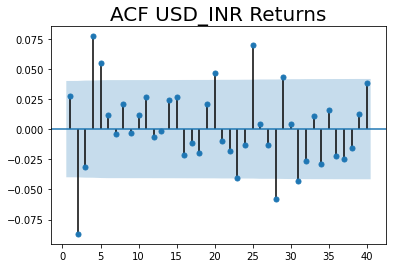

In [ ]:
sgt.plot_acf(df_train.returns, lags=40, zero=False)
plt.title("ACF USD_INR Returns", size=20)
plt.show()

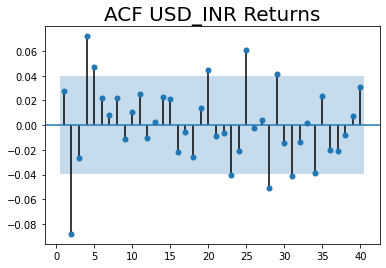

In [ ]:
sgt.plot_pacf(df_train.returns, lags=40, zero=False, method=('ols'))
plt.title("ACF USD_INR Returns", size=20)
plt.show()

In [ ]:
model_ret_ar_1=ARMA(df_train.returns, order=(1,0))
results_ret_ar_1=model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(1, 0)   Log Likelihood               -1529.320
Method:                       css-mle   S.D. of innovations              0.457
Date:                Mon, 15 Aug 2022   AIC                           3064.640
Time:                        10:15:32   BIC                           3081.999
Sample:                    01-03-2011   HQIC                          3070.955
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.010      2.447      0.014       0.005       0.042
ar.L1.returns     0.0274      0.020      1.344      0.179      -0.013       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           36.5286           +0.0000j           36.5286            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ret_ar_2=ARMA(df_train.returns, order=(2,0))
results_ret_ar_2=model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(2, 0)   Log Likelihood               -1519.988
Method:                       css-mle   S.D. of innovations              0.455
Date:                Mon, 15 Aug 2022   AIC                           3047.976
Time:                        10:15:32   BIC                           3071.121
Sample:                    01-03-2011   HQIC                          3056.395
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.009      2.666      0.008       0.006       0.041
ar.L1.returns     0.0298      0.020      1.468      0.142      -0.010       0.070
ar.L2.returns    -0.0880      0.020     -4.329      0.000      -0.128      -0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1693           -3.3663j            3.3706           -0.2420
AR.2            0.1693           +3.3663j            3.3706            0.2420
-----------------------------------------------------------------------------
"""

In [ ]:
model_ret_ar_3=ARMA(df_train.returns, order=(3,0))
results_ret_ar_3=model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(3, 0)   Log Likelihood               -1519.138
Method:                       css-mle   S.D. of innovations              0.455
Date:                Mon, 15 Aug 2022   AIC                           3048.276
Time:                        10:15:33   BIC                           3077.206
Sample:                    01-03-2011   HQIC                          3058.799
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0233      0.009      2.735      0.006       0.007       0.040
ar.L1.returns     0.0275      0.020      1.349      0.178      -0.012       0.067
ar.L2.returns    -0.0873      0.020     -4.293      0.000      -0.127      -0.047
ar.L3.returns    -0.0266      0.020     -1.304      0.192      -0.067       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8569           -2.6051j            2.7424           -0.1994
AR.2            0.8569           +2.6051j            2.7424            0.1994
AR.3           -4.9902           -0.0000j            4.9902           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ret_ar_4=ARMA(df_train.returns, order=(4,0))
results_ret_ar_4=model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(4, 0)   Log Likelihood               -1512.926
Method:                       css-mle   S.D. of innovations              0.454
Date:                Mon, 15 Aug 2022   AIC                           3037.851
Time:                        10:15:33   BIC                           3072.568
Sample:                    01-03-2011   HQIC                          3050.479
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.009      2.555      0.011       0.005       0.041
ar.L1.returns     0.0294      0.020      1.446      0.148      -0.010       0.069
ar.L2.returns    -0.0810      0.020     -3.978      0.000      -0.121      -0.041
ar.L3.returns    -0.0284      0.020     -1.392      0.164      -0.068       0.012
ar.L4.returns     0.0719      0.020      3.529      0.000       0.032       0.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0021           -0.0000j            2.0021           -0.5000
AR.2            0.1105           -1.7830j            1.7865           -0.2402
AR.3            0.1105           +1.7830j            1.7865            0.2402
AR.4            2.1756           -0.0000j            2.1756           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ret_ar_5=ARMA(df_train.returns, order=(5,0))
results_ret_ar_5=model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(5, 0)   Log Likelihood               -1510.276
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3034.551
Time:                        10:15:34   BIC                           3075.054
Sample:                    01-03-2011   HQIC                          3049.284
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0235      0.010      2.447      0.014       0.005       0.042
ar.L1.returns     0.0260      0.020      1.278      0.201      -0.014       0.066
ar.L2.returns    -0.0796      0.020     -3.910      0.000      -0.119      -0.040
ar.L3.returns    -0.0245      0.020     -1.199      0.231      -0.065       0.016
ar.L4.returns     0.0707      0.020      3.474      0.001       0.031       0.111
ar.L5.returns     0.0470      0.020      2.303      0.021       0.007       0.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7160           -0.0000j            1.7160           -0.0000
AR.2            0.3102           -1.5740j            1.6043           -0.2190
AR.3            0.3102           +1.5740j            1.6043            0.2190
AR.4           -1.9203           -1.0615j            2.1941           -0.4196
AR.5           -1.9203           +1.0615j            2.1941            0.4196
-----------------------------------------------------------------------------
"""

In [ ]:
model_ret_ar_6=ARMA(df_train.returns, order=(6,0))
results_ret_ar_6=model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(6, 0)   Log Likelihood               -1509.715
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3035.429
Time:                        10:15:35   BIC                           3081.718
Sample:                    01-03-2011   HQIC                          3052.267
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0236      0.010      2.399      0.017       0.004       0.043
ar.L1.returns     0.0250      0.020      1.227      0.220      -0.015       0.065
ar.L2.returns    -0.0811      0.020     -3.976      0.000      -0.121      -0.041
ar.L3.returns    -0.0239      0.020     -1.170      0.242      -0.064       0.016
ar.L4.returns     0.0725      0.020      3.549      0.000       0.032       0.113
ar.L5.returns     0.0466      0.020      2.280      0.023       0.007       0.087
ar.L6.returns     0.0216      0.020      1.059      0.290      -0.018       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5829           -0.0000j            1.5829           -0.0000
AR.2            0.4477           -1.5401j            1.6039           -0.2050
AR.3            0.4477           +1.5401j            1.6039            0.2050
AR.4           -2.0449           -0.0000j            2.0449           -0.5000
AR.5           -1.2922           -1.9694j            2.3555           -0.3424
AR.6           -1.2922           +1.9694j            2.3555            0.3424
-----------------------------------------------------------------------------
"""

Normalised Returns


In [ ]:
bench_ret=df_train.returns.iloc[0]
df_train['norm_ret']=df_train.returns.div(bench_ret)*100
sts.adfuller(df_train.norm_ret)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(-20.53395301411573,
 0.0,
 4,
 2402,
 {'1%': -3.433075354750434,
  '10%': -2.5674109531399383,
  '5%': -2.8627440256609367},
 32567.974606800948)

In [ ]:
model_norm_ret_ar_1=ARMA(df_train.norm_ret, order=(1,0))
results_norm_ret_ar_1=model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 2407
Model:                     ARMA(1, 0)   Log Likelihood              -16487.882
Method:                       css-mle   S.D. of innovations            228.385
Date:                Mon, 15 Aug 2022   AIC                          32981.764
Time:                        10:15:37   BIC                          32999.122
Sample:                    01-03-2011   HQIC                         32988.078
                         - 03-24-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.7190      4.786     -2.449      0.014     -21.099      -2.338
ar.L1.norm_ret     0.0274      0.020      1.344      0.179      -0.013       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           36.5286           +0.0000j           36.5286            0.0000
-----------------------------------------------------------------------------
"""

Using normalised value has no effect on model selection as the lagged variables have same value in both

Residuals

In [ ]:
df_train['res_price']=results_ar_6 .resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.res_price.mean()

0.006085133416217658

In [ ]:
df_train.res_price.var()

0.18595886228312006

In [ ]:
sts.adfuller(df_train.res_price)

(-77.41938888057686,
 0.0,
 0,
 2406,
 {'1%': -3.4330708189719914,
  '10%': -2.567409886740616,
  '5%': -2.862742022728184},
 647.0350721003442)

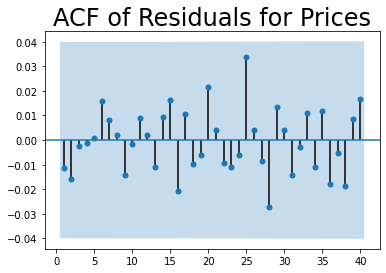

In [ ]:
sgt.plot_acf(df_train.res_price, zero=False, lags=40)
plt.title("ACF of Residuals for Prices", size=24)
plt.show()

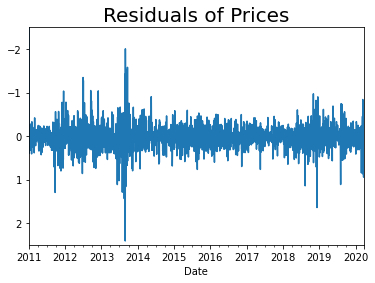

In [ ]:
df_train.res_price.plot()
plt.ylim(2.5,-2.5)
plt.title("Residuals of Prices", size=20)
plt.show()

Residuals of returns

In [ ]:
df_train['res_ret']=results_ret_ar_5.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.res_ret.mean()

-3.452450003763333e-05

In [ ]:
df_train.res_ret.var()

0.20544988517950225

In [ ]:
sts.adfuller(df_train.res_ret)

(-49.08320535195913,
 0.0,
 0,
 2406,
 {'1%': -3.4330708189719914,
  '10%': -2.567409886740616,
  '5%': -2.862742022728184},
 2990.921149766422)

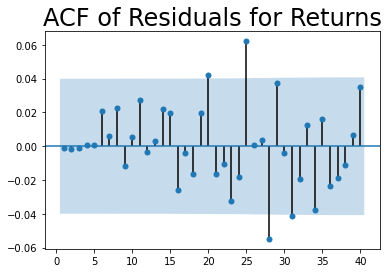

In [ ]:
sgt.plot_acf(df_train.res_ret, zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

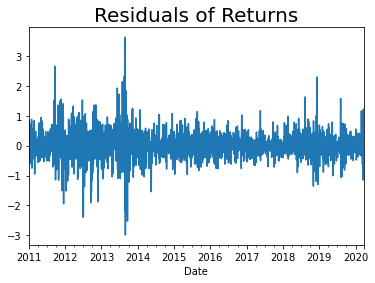

In [ ]:
df_train.res_ret.plot()
#plt.ylim(2.5,-2.5)
plt.title("Residuals of Returns", size=20)
plt.show()

**MOVING AVERAGES**

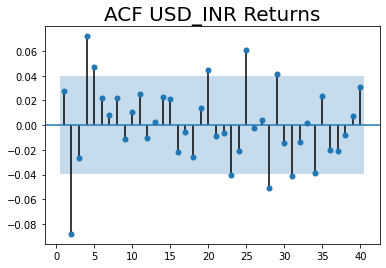

In [ ]:
sgt.plot_pacf(df_train.returns, lags=40, zero=False, method=('ols'))
plt.title("ACF USD_INR Returns", size=20)
plt.show()

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

MA(1) for returns

In [ ]:
model_ret_ma_1=ARMA(df_train.returns, order=(0,1))
results_ret_ma_1=model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(0, 1)   Log Likelihood               -1529.132
Method:                       css-mle   S.D. of innovations              0.457
Date:                Mon, 15 Aug 2022   AIC                           3064.264
Time:                        10:15:41   BIC                           3081.622
Sample:                    01-03-2011   HQIC                          3070.578
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.010      2.436      0.015       0.005       0.042
ma.L1.returns     0.0330      0.022      1.480      0.139      -0.011       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -30.2697           +0.0000j           30.2697            0.5000
-----------------------------------------------------------------------------
"""

Higher MA model

In [ ]:
model_ret_ma_2=ARMA(df_train.returns, order=(0,2))
results_ret_ma_2=model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(0, 2)   Log Likelihood               -1521.463
Method:                       css-mle   S.D. of innovations              0.455
Date:                Mon, 15 Aug 2022   AIC                           3050.926
Time:                        10:15:41   BIC                           3074.071
Sample:                    01-03-2011   HQIC                          3059.345
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.009      2.649      0.008       0.006       0.041
ma.L1.returns     0.0256      0.020      1.264      0.206      -0.014       0.065
ma.L2.returns    -0.0748      0.019     -3.942      0.000      -0.112      -0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.4892           +0.0000j            3.4892            0.5000
MA.2            3.8312           +0.0000j            3.8312            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ma_1, results_ret_ma_2)

0.0

In [ ]:
model_ret_ma_3=ARMA(df_train.returns, order=(0,3))
results_ret_ma_3=model_ret_ma_3.fit()
results_ret_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(0, 3)   Log Likelihood               -1520.555
Method:                       css-mle   S.D. of innovations              0.455
Date:                Mon, 15 Aug 2022   AIC                           3051.109
Time:                        10:15:42   BIC                           3080.040
Sample:                    01-03-2011   HQIC                          3061.633
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0233      0.009      2.701      0.007       0.006       0.040
ma.L1.returns     0.0319      0.021      1.541      0.123      -0.009       0.072
ma.L2.returns    -0.0729      0.019     -3.833      0.000      -0.110      -0.036
ma.L3.returns    -0.0276      0.020     -1.349      0.177      -0.068       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.7112           -0.0000j            2.7112           -0.0000
MA.2           -2.6741           -2.4891j            3.6533           -0.3807
MA.3           -2.6741           +2.4891j            3.6533            0.3807
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ma_2, results_ret_ma_3)

0.178

In [ ]:
model_ret_ma_4=ARMA(df_train.returns, order=(0,4))
results_ret_ma_4=model_ret_ma_4.fit()
results_ret_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(0, 4)   Log Likelihood               -1513.731
Method:                       css-mle   S.D. of innovations              0.454
Date:                Mon, 15 Aug 2022   AIC                           3039.463
Time:                        10:15:42   BIC                           3074.180
Sample:                    01-03-2011   HQIC                          3052.091
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0235      0.009      2.556      0.011       0.005       0.041
ma.L1.returns     0.0214      0.020      1.044      0.297      -0.019       0.062
ma.L2.returns    -0.0811      0.021     -3.952      0.000      -0.121      -0.041
ma.L3.returns    -0.0227      0.020     -1.126      0.260      -0.062       0.017
ma.L4.returns     0.0745      0.020      3.708      0.000       0.035       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3778           -1.2377j            1.8520           -0.3835
MA.2           -1.3778           +1.2377j            1.8520            0.3835
MA.3            1.5301           -1.2539j            1.9783           -0.1093
MA.4            1.5301           +1.2539j            1.9783            0.1093
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ma_3, results_ret_ma_4)

0.0

In [ ]:
model_ret_ma_5=ARMA(df_train.returns, order=(0,5))
results_ret_ma_5=model_ret_ma_5.fit()
results_ret_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(0, 5)   Log Likelihood               -1509.994
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3033.988
Time:                        10:15:43   BIC                           3074.491
Sample:                    01-03-2011   HQIC                          3048.721
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0235      0.010      2.441      0.015       0.005       0.042
ma.L1.returns     0.0241      0.020      1.184      0.237      -0.016       0.064
ma.L2.returns    -0.0811      0.020     -3.979      0.000      -0.121      -0.041
ma.L3.returns    -0.0297      0.020     -1.467      0.143      -0.069       0.010
ma.L4.returns     0.0757      0.020      3.803      0.000       0.037       0.115
ma.L5.returns     0.0559      0.020      2.737      0.006       0.016       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2987           -0.9447j            1.6060           -0.1001
MA.2            1.2987           +0.9447j            1.6060            0.1001
MA.3           -0.9154           -1.5597j            1.8085           -0.3345
MA.4           -0.9154           +1.5597j            1.8085            0.3345
MA.5           -2.1215           -0.0000j            2.1215           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ma_4, results_ret_ma_5)

0.006

In [ ]:
LLR_test(results_ret_ma_3, results_ret_ma_5, DF=2)

0.0

In [ ]:
LLR_test(results_ret_ma_2, results_ret_ma_5, DF=3)

0.0

In [ ]:
model_ret_ma_6=ARMA(df_train.returns, order=(0,6))
results_ret_ma_6=model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(0, 6)   Log Likelihood               -1509.802
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3035.604
Time:                        10:15:45   BIC                           3081.893
Sample:                    01-03-2011   HQIC                          3052.442
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0236      0.010      2.415      0.016       0.004       0.043
ma.L1.returns     0.0250      0.020      1.225      0.221      -0.015       0.065
ma.L2.returns    -0.0808      0.020     -3.965      0.000      -0.121      -0.041
ma.L3.returns    -0.0300      0.021     -1.462      0.144      -0.070       0.010
ma.L4.returns     0.0747      0.020      3.740      0.000       0.036       0.114
ma.L5.returns     0.0555      0.020      2.720      0.007       0.016       0.096
ma.L6.returns     0.0126      0.020      0.620      0.535      -0.027       0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2813           -0.8834j            1.5563           -0.0961
MA.2            1.2813           +0.8834j            1.5563            0.0961
MA.3           -0.8919           -1.8122j            2.0198           -0.3228
MA.4           -0.8919           +1.8122j            2.0198            0.3228
MA.5           -2.5902           -1.1461j            2.8324           -0.4337
MA.6           -2.5902           +1.1461j            2.8324            0.4337
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ma_5, results_ret_ma_6)

0.535

In [ ]:
model_ret_ma_7=ARMA(df_train.returns, order=(0,7))
results_ret_ma_7=model_ret_ma_7.fit()
results_ret_ma_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(0, 7)   Log Likelihood               -1509.703
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3037.406
Time:                        10:15:47   BIC                           3089.482
Sample:                    01-03-2011   HQIC                          3056.349
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0236      0.010      2.433      0.015       0.005       0.043
ma.L1.returns     0.0253      0.020      1.241      0.215      -0.015       0.065
ma.L2.returns    -0.0813      0.020     -3.986      0.000      -0.121      -0.041
ma.L3.returns    -0.0307      0.021     -1.490      0.136      -0.071       0.010
ma.L4.returns     0.0754      0.020      3.767      0.000       0.036       0.115
ma.L5.returns     0.0564      0.021      2.750      0.006       0.016       0.097
ma.L6.returns     0.0124      0.020      0.607      0.544      -0.028       0.052
ma.L7.returns    -0.0090      0.020     -0.445      0.657      -0.049       0.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.7441           -0.8639j            1.9463           -0.4268
MA.2           -1.7441           +0.8639j            1.9463            0.4268
MA.3           -0.6470           -1.6865j            1.8064           -0.3083
MA.4           -0.6470           +1.6865j            1.8064            0.3083
MA.5            1.2532           -0.9444j            1.5692           -0.1028
MA.6            1.2532           +0.9444j            1.5692            0.1028
MA.7            3.6472           -0.0000j            3.6472           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ma_6, results_ret_ma_7)

0.656

We can see that MA(5) is better model in terms of llr


*   LLR test indicates if higher model is better or not




Extracting Residuals for returns

In [ ]:
df_train["res_ret_ma_5"]=results_ret_ma_5.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.res_ret_ma_5.mean().round(3)

-0.0

In [ ]:
df_train.res_ret_ma_5.var().round(3)

0.205

In [ ]:
#standard deviation
import math
round(math.sqrt(df_train.res_ret_ma_5.var()),3)

0.453

Gaussian white noise indicates normality. So, we can expect most data to lie between 3 standard deviations 

In [ ]:
3*0.453

1.359

Text(0.5, 1.0, 'Residuals of Returns')

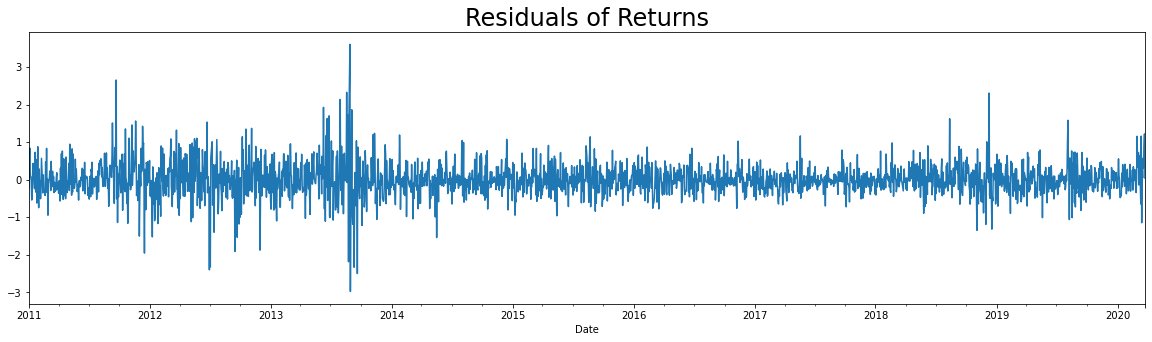

In [ ]:
#plotting 
df_train.res_ret_ma_5.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)

Lets check for stationarity. A non stationary data can't be a white noise

In [ ]:
sts.adfuller(df_train.res_ret_ma_5)

(-48.99902191197659,
 0.0,
 0,
 2406,
 {'1%': -3.4330708189719914,
  '10%': -2.567409886740616,
  '5%': -2.862742022728184},
 2990.3150101776228)

Since the p-value is 0. The data is indeed stationary.

We also need to examine the ACF plot before confirming that it is white noise.

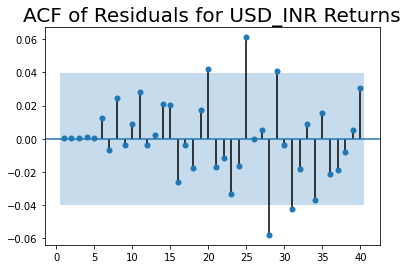

In [ ]:
sgt.plot_pacf(df_train.res_ret_ma_5, lags=40, zero=False)
plt.title("ACF of Residuals for USD_INR Returns", size=20)
plt.show()

The later values must not effect the market. Since, market adjust to shocks, so values far in past lose relevance

**Normalised returns**

Note:- This is important as we will be comparing different market indices

In [ ]:
bench_ret=df_train.returns.iloc[1]
df_train['norm_ret']=df_train.returns.div(bench_ret)*100
sts.adfuller(df_train.norm_ret)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(-20.5339530141157,
 0.0,
 4,
 2402,
 {'1%': -3.433075354750434,
  '10%': -2.5674109531399383,
  '5%': -2.8627440256609367},
 26887.291501809104)

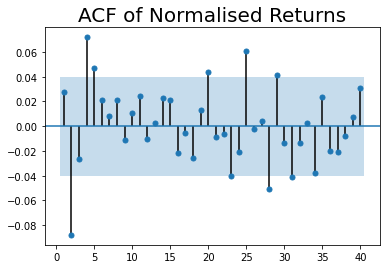

In [ ]:
sgt.plot_pacf(df_train.norm_ret, lags=40, zero=False)
plt.title("ACF of Normalised Returns", size=20)
plt.show()

The plot for normalised returns is similar to the ACF for returns.

In [ ]:
model_norm_ret_ma_5=ARMA(df_train.norm_ret, order =(0,5))
results_norm_ret_ma_5=model_norm_ret_ma_5.fit()
results_norm_ret_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 2407
Model:                     ARMA(0, 5)   Log Likelihood              -13594.785
Method:                       css-mle   S.D. of innovations             68.653
Date:                Mon, 15 Aug 2022   AIC                          27203.569
Time:                        10:15:51   BIC                          27244.072
Sample:                    01-03-2011   HQIC                         27218.302
                         - 03-24-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.5682      1.462      2.441      0.015       0.703       6.433
ma.L1.norm_ret     0.0241      0.020      1.184      0.237      -0.016       0.064
ma.L2.norm_ret    -0.0811      0.020     -3.979      0.000      -0.121      -0.041
ma.L3.norm_ret    -0.0297      0.020     -1.467      0.143      -0.069       0.010
ma.L4.norm_ret     0.0757      0.020      3.803      0.000       0.037       0.115
ma.L5.norm_ret     0.0559      0.020      2.737      0.006       0.016       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2987           -0.9447j            1.6060           -0.1001
MA.2            1.2987           +0.9447j            1.6060            0.1001
MA.3           -0.9154           -1.5597j            1.8085           -0.3345
MA.4           -0.9154           +1.5597j            1.8085            0.3345
MA.5           -2.1215           -0.0000j            2.1215           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
df_train['res_norm_ret_ma_5']=results_ret_ma_5.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Residuals of Normalised Returns')

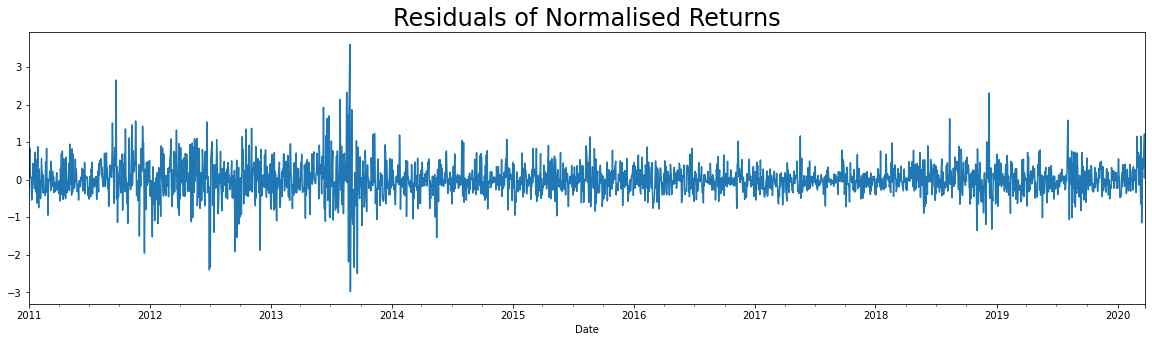

In [ ]:
#plotting 
df_train.res_norm_ret_ma_5.plot(figsize=(20,5))
plt.title("Residuals of Normalised Returns", size=24)

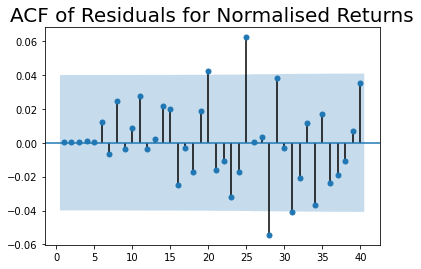

In [ ]:
sgt.plot_acf(df_train.res_norm_ret_ma_5, lags=40, zero=False)
plt.title("ACF of Residuals for Normalised Returns", size=20)
plt.show()

**MA models for non-stationary data**

AutoRegressive(AR) models are less reliable when estimating non stationary data

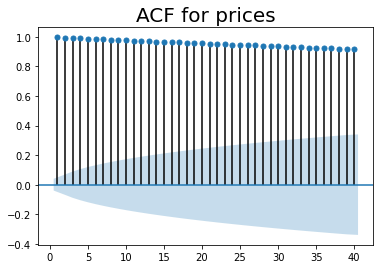

In [ ]:
sgt.plot_acf(df_train.Price, lags=40, zero=False)
plt.title("ACF for prices", size=20)
plt.show()
#to check for lags to include

This implies higher models are better. For best, we will have to consider MA(infinity) but no such model exists. So, we can say that no moving average model exists.

An MA(1) model where all coefficiencts are close to 1 is AR(n) model that considers error from n periods back.

"MA models are great in modelling the Random walks because they take into account our mistakes."

To do a good job at modelling, the model should also consider the previous period's value. So, some combination of MA and AR would be the best.

Residuals did not fully resemble white noise using AR or MA. 

AR failed to adjust quickly to shocks.
MA smooth out the predictions.

This gives birth to ARMA model.


ARMA(1,1)

In [ ]:
model_ret_ar_1_ma_1=ARMA(df_train.returns, order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(1, 1)   Log Likelihood               -1527.150
Method:                       css-mle   S.D. of innovations              0.456
Date:                Mon, 15 Aug 2022   AIC                           3062.300
Time:                        10:15:53   BIC                           3085.445
Sample:                    01-03-2011   HQIC                          3070.719
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.010      2.438      0.015       0.005       0.042
ar.L1.returns    -0.4070      0.178     -2.290      0.022      -0.755      -0.059
ma.L1.returns     0.4531      0.173      2.623      0.009       0.115       0.792
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4573           +0.0000j            2.4573            0.5000
MA.1           -2.2068           +0.0000j            2.2068            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
#AR(1) vs ARMA(1,1)
LLR_test(results_ret_ar_1, results_ret_ar_1_ma_1)

0.037

In [ ]:
#MA(1) vs ARMA(1, 1)
LLR_test(results_ret_ma_1, results_ret_ar_1_ma_1)

0.046

**Higher Lag ARMA model**

In [ ]:
model_ret_ar_2_ma_2 = ARMA(df_train.returns, order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(2, 2)   Log Likelihood               -1514.063
Method:                       css-mle   S.D. of innovations              0.454
Date:                Mon, 15 Aug 2022   AIC                           3040.125
Time:                        10:15:54   BIC                           3074.842
Sample:                    01-03-2011   HQIC                          3052.753
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.009      2.680      0.007       0.006       0.040
ar.L1.returns     0.2735      0.173      1.584      0.113      -0.065       0.612
ar.L2.returns    -0.5546      0.107     -5.175      0.000      -0.765      -0.345
ma.L1.returns    -0.2498      0.185     -1.349      0.178      -0.613       0.113
ma.L2.returns     0.4580      0.113      4.036      0.000       0.236       0.680
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2465           -1.3199j            1.3427           -0.2206
AR.2            0.2465           +1.3199j            1.3427            0.2206
MA.1            0.2727           -1.4523j            1.4776           -0.2205
MA.2            0.2727           +1.4523j            1.4776            0.2205
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ar_1_ma_1, results_ret_ar_2_ma_2, DF = 2)

0.0

In [ ]:
model_ret_ar_1_ma_2 = ARMA(df_train.returns, order=(1,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()
results_ret_ar_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(1, 2)   Log Likelihood               -1521.186
Method:                       css-mle   S.D. of innovations              0.455
Date:                Mon, 15 Aug 2022   AIC                           3052.371
Time:                        10:15:55   BIC                           3081.302
Sample:                    01-03-2011   HQIC                          3062.895
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.009      2.669      0.008       0.006       0.041
ar.L1.returns     0.1098      0.144      0.762      0.446      -0.172       0.392
ma.L1.returns    -0.0823      0.143     -0.577      0.564      -0.362       0.197
ma.L2.returns    -0.0781      0.019     -4.136      0.000      -0.115      -0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.1073           +0.0000j            9.1073            0.0000
MA.1            3.0906           +0.0000j            3.0906            0.0000
MA.2           -4.1443           +0.0000j            4.1443            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ar_1_ma_2, results_ret_ar_2_ma_2)

0.0

In [ ]:
model_ret_ar_2_ma_1 = ARMA(df_train.returns, order=(2,1))
results_ret_ar_2_ma_1 = model_ret_ar_2_ma_1.fit()
results_ret_ar_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(2, 1)   Log Likelihood               -1519.680
Method:                       css-mle   S.D. of innovations              0.455
Date:                Mon, 15 Aug 2022   AIC                           3049.360
Time:                        10:15:55   BIC                           3078.290
Sample:                    01-03-2011   HQIC                          3059.883
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0234      0.009      2.696      0.007       0.006       0.040
ar.L1.returns     0.1353      0.132      1.024      0.306      -0.124       0.394
ar.L2.returns    -0.0919      0.020     -4.488      0.000      -0.132      -0.052
ma.L1.returns    -0.1063      0.132     -0.807      0.420      -0.364       0.152
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7361           -3.2161j            3.2992           -0.2142
AR.2            0.7361           +3.2161j            3.2992            0.2142
MA.1            9.4105           +0.0000j            9.4105            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ar_2_ma_1, results_ret_ar_2_ma_2)

0.001

In [ ]:
model_ret_ar_3_ma_3 = ARMA(df_train.returns, order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit(start_ar_lags=4)
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(3, 3)   Log Likelihood               -1509.833
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3035.666
Time:                        10:15:57   BIC                           3081.956
Sample:                    01-03-2011   HQIC                          3052.504
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0237      0.011      2.250      0.025       0.003       0.044
ar.L1.returns     1.2778      0.136      9.418      0.000       1.012       1.544
ar.L2.returns    -0.8508      0.182     -4.663      0.000      -1.208      -0.493
ar.L3.returns     0.4170      0.125      3.332      0.001       0.172       0.662
ma.L1.returns    -1.2517      0.142     -8.796      0.000      -1.531      -0.973
ma.L2.returns     0.7300      0.193      3.783      0.000       0.352       1.108
ma.L3.returns    -0.3000      0.131     -2.291      0.022      -0.557      -0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1718           -0.0000j            1.1718           -0.0000
AR.2            0.4343           -1.3631j            1.4306           -0.2009
AR.3            0.4343           +1.3631j            1.4306            0.2009
MA.1            1.2380           -0.0000j            1.2380           -0.0000
MA.2            0.5976           -1.5281j            1.6408           -0.1907
MA.3            0.5976           +1.5281j            1.6408            0.1907
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ar_2_ma_2, results_ret_ar_3_ma_3)

0.004

In [ ]:
model_ret_ar_2_ma_3 = ARMA(df_train.returns, order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit(start_ar_lags=4)
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(2, 3)   Log Likelihood               -1512.947
Method:                       css-mle   S.D. of innovations              0.454
Date:                Mon, 15 Aug 2022   AIC                           3039.894
Time:                        10:15:58   BIC                           3080.397
Sample:                    01-03-2011   HQIC                          3054.627
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0235      0.009      2.531      0.011       0.005       0.042
ar.L1.returns     0.9381      0.148      6.350      0.000       0.649       1.228
ar.L2.returns    -0.5591      0.120     -4.657      0.000      -0.794      -0.324
ma.L1.returns    -0.9155      0.148     -6.186      0.000      -1.206      -0.625
ma.L2.returns     0.4473      0.126      3.560      0.000       0.201       0.694
ma.L3.returns     0.0916      0.024      3.879      0.000       0.045       0.138
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8389           -1.0415j            1.3373           -0.1421
AR.2            0.8389           +1.0415j            1.3373            0.1421
MA.1            0.8769           -0.9359j            1.2825           -0.1302
MA.2            0.8769           +0.9359j            1.2825            0.1302
MA.3           -6.6358           -0.0000j            6.6358           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ar_2_ma_3, results_ret_ar_3_ma_3)

0.013

In [ ]:
model_ret_ar_3_ma_2 = ARMA(df_train.returns, order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit(start_ar_lags=4)
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(3, 2)   Log Likelihood               -1511.955
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3037.909
Time:                        10:15:59   BIC                           3078.412
Sample:                    01-03-2011   HQIC                          3052.642
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0236      0.010      2.448      0.014       0.005       0.042
ar.L1.returns     1.0772      0.171      6.301      0.000       0.742       1.412
ar.L2.returns    -0.5954      0.144     -4.130      0.000      -0.878      -0.313
ar.L3.returns     0.1118      0.027      4.110      0.000       0.059       0.165
ma.L1.returns    -1.0509      0.171     -6.144      0.000      -1.386      -0.716
ma.L2.returns     0.4739      0.149      3.186      0.001       0.182       0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0725           -1.2894j            1.6771           -0.1396
AR.2            1.0725           +1.2894j            1.6771            0.1396
AR.3            3.1787           -0.0000j            3.1787           -0.0000
MA.1            1.1087           -0.9385j            1.4526           -0.1118
MA.2            1.1087           +0.9385j            1.4526            0.1118
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(results_ret_ar_3_ma_2, results_ret_ar_3_ma_3)

0.039

In [ ]:
LLR_test(results_ret_ar_2_ma_2, results_ret_ar_2_ma_3)

0.135

In [ ]:
model_ret_ar_4_ma_3 = ARMA(df_train.returns, order=(4,3))
results_ret_ar_4_ma_3 = model_ret_ar_4_ma_3.fit(start_ar_lags=6)
results_ret_ar_4_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(4, 3)   Log Likelihood               -1509.205
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3036.411
Time:                        10:16:01   BIC                           3088.486
Sample:                    01-03-2011   HQIC                          3055.353
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0237      0.010      2.270      0.023       0.003       0.044
ar.L1.returns     0.7683      0.332      2.312      0.021       0.117       1.420
ar.L2.returns    -0.2771      0.389     -0.713      0.476      -1.039       0.484
ar.L3.returns     0.1639      0.230      0.713      0.476      -0.286       0.614
ar.L4.returns     0.0725      0.044      1.662      0.097      -0.013       0.158
ma.L1.returns    -0.7439      0.333     -2.236      0.025      -1.396      -0.092
ma.L2.returns     0.1768      0.380      0.465      0.642      -0.568       0.922
ma.L3.returns    -0.1246      0.200     -0.622      0.534      -0.517       0.268
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2325           -0.0000j            1.2325           -0.0000
AR.2            0.2809           -1.6376j            1.6615           -0.2230
AR.3            0.2809           +1.6376j            1.6615            0.2230
AR.4           -4.0563           -0.0000j            4.0563           -0.5000
MA.1            1.3619           -0.0000j            1.3619           -0.0000
MA.2            0.0283           -2.4271j            2.4273           -0.2481
MA.3            0.0283           +2.4271j            2.4273            0.2481
-----------------------------------------------------------------------------
"""

In [ ]:
model_ret_ar_4_ma_4 = ARMA(df_train.returns, order=(4,4))
results_ret_ar_4_ma_4 = model_ret_ar_4_ma_4.fit(start_ar_lags=6)
results_ret_ar_4_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 2407
Model:                     ARMA(4, 4)   Log Likelihood               -1509.169
Method:                       css-mle   S.D. of innovations              0.453
Date:                Mon, 15 Aug 2022   AIC                           3038.338
Time:                        10:16:04   BIC                           3096.199
Sample:                    01-03-2011   HQIC                          3059.384
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0237      0.010      2.260      0.024       0.003       0.044
ar.L1.returns     0.4990      0.415      1.204      0.229      -0.314       1.312
ar.L2.returns     0.0880      0.543      0.162      0.871      -0.976       1.152
ar.L3.returns    -0.1201      0.419     -0.286      0.775      -0.942       0.702
ar.L4.returns     0.2301      0.244      0.945      0.345      -0.247       0.707
ma.L1.returns    -0.4745      0.417     -1.139      0.255      -1.291       0.342
ma.L2.returns    -0.1823      0.537     -0.340      0.734      -1.234       0.869
ma.L3.returns     0.1296      0.383      0.338      0.735      -0.621       0.880
ma.L4.returns    -0.1283      0.212     -0.604      0.546      -0.545       0.288
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2027           -0.0000j            1.2027           -0.0000
AR.2           -1.4946           -0.0000j            1.4946           -0.5000
AR.3            0.4069           -1.5007j            1.5549           -0.2079
AR.4            0.4069           +1.5007j            1.5549            0.2079
MA.1           -1.5748           -0.0000j            1.5748           -0.5000
MA.2            1.2952           -0.0000j            1.2952           -0.0000
MA.3            0.6447           -1.8455j            1.9549           -0.1965
MA.4            0.6447           +1.8455j            1.9549            0.1965
-----------------------------------------------------------------------------
"""

We can say that ARMA(3,3) is the best model since 

1.   it has all significant coeffiecient
2.   outpredicts all less complex alternatives ( higher log likelihood and lower aic)



**Residuals**

In [ ]:
df_train['res_ret_ar_3_ma_3'] = results_ret_ar_3_ma_3.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


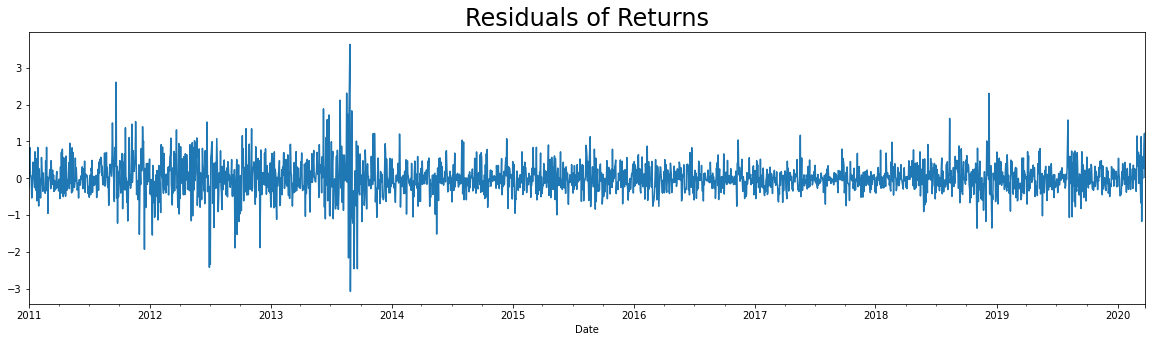

In [ ]:
df_train.res_ret_ar_3_ma_3.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

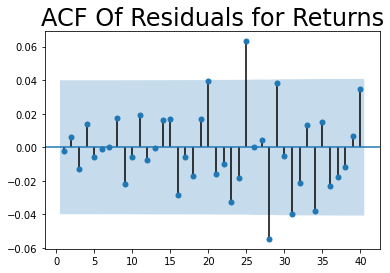

In [ ]:
sgt.plot_acf(df_train.res_ret_ar_3_ma_3, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

How does ARMA model handles non stationary data like Prices

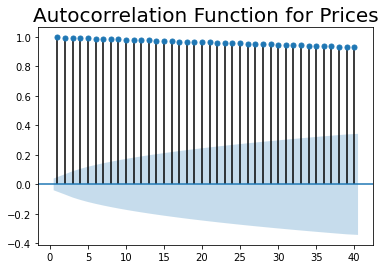

In [ ]:
sgt.plot_acf(df_train.Price, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

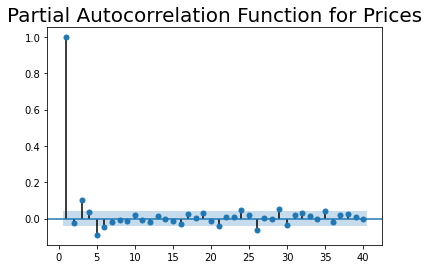

In [ ]:
sgt.plot_pacf(df_train.Price, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [ ]:
model_ar_1_ma_1 = ARMA(df_train.Price, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(1, 1)   Log Likelihood                -351.504
Method:                       css-mle   S.D. of innovations              0.280
Date:                Mon, 15 Aug 2022   AIC                            711.009
Time:                        10:16:07   BIC                            734.153
Sample:                    01-03-2011   HQIC                           719.427
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.8012     12.034      5.053      0.000      37.216      84.387
ar.L1.Price     0.9998      0.000   3368.320      0.000       0.999       1.000
ma.L1.Price     0.0358      0.023      1.583      0.114      -0.009       0.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           +0.0000j            1.0002            0.0000
MA.1          -27.9508           +0.0000j           27.9508            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
df_train['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


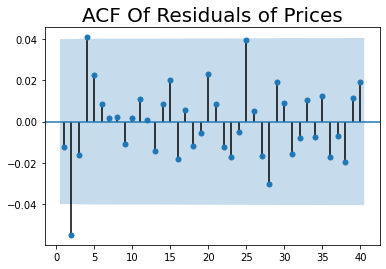

In [ ]:
sgt.plot_acf(df_train.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [ ]:
model_ar_4_ma_4 = ARMA(df_train.Price, order=(4,4))
results_ar_4_ma_4 = model_ar_4_ma_4.fit(start_ar_lags = 8)
results_ar_4_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(4, 4)   Log Likelihood                -325.038
Method:                       css-mle   S.D. of innovations              0.277
Date:                Mon, 15 Aug 2022   AIC                            670.077
Time:                        10:16:10   BIC                            727.938
Sample:                    01-03-2011   HQIC                           691.124
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.9106     11.805      5.160      0.000      37.773      84.048
ar.L1.Price     1.7124      0.001   1335.089      0.000       1.710       1.715
ar.L2.Price    -1.0605      0.002   -457.446      0.000      -1.065      -1.056
ar.L3.Price     0.5852      0.004    156.403      0.000       0.578       0.593
ar.L4.Price    -0.2373      0.003    -74.044      0.000      -0.244      -0.231
ma.L1.Price    -0.6867      0.020    -33.755      0.000      -0.727      -0.647
ma.L2.Price     0.2403      0.024      9.831      0.000       0.192       0.288
ma.L3.Price    -0.1992      0.025     -8.084      0.000      -0.247      -0.151
ma.L4.Price     0.0850      0.020      4.189      0.000       0.045       0.125
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           -0.0000j            1.0003           -0.0000
AR.2            1.4286           -0.0000j            1.4286           -0.0000
AR.3            0.0188           -1.7173j            1.7174           -0.2483
AR.4            0.0188           +1.7173j            1.7174            0.2483
MA.1           -0.5767           -1.7623j            1.8543           -0.3003
MA.2           -0.5767           +1.7623j            1.8543            0.3003
MA.3            1.7482           -0.6037j            1.8495           -0.0529
MA.4            1.7482           +0.6037j            1.8495            0.0529
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_5_ma_5 = ARMA(df_train.Price, order=(5,5))
results_ar_5_ma_5 = model_ar_5_ma_5.fit(start_ar_lags = 8)
results_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(5, 5)   Log Likelihood                -324.780
Method:                       css-mle   S.D. of innovations              0.276
Date:                Mon, 15 Aug 2022   AIC                            673.559
Time:                        10:16:35   BIC                            742.993
Sample:                    01-03-2011   HQIC                           698.815
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.6209     14.202      4.268      0.000      32.785      88.457
ar.L1.Price     2.2845   8.26e-05   2.77e+04      0.000       2.284       2.285
ar.L2.Price    -1.9446   8.88e-05  -2.19e+04      0.000      -1.945      -1.944
ar.L3.Price     0.9703   9.21e-05   1.05e+04      0.000       0.970       0.971
ar.L4.Price    -0.3476      0.000  -1536.630      0.000      -0.348      -0.347
ar.L5.Price     0.0373      0.000    173.898      0.000       0.037       0.038
ma.L1.Price    -1.2593      0.020    -61.899      0.000      -1.299      -1.219
ma.L2.Price     0.5380      0.033     16.448      0.000       0.474       0.602
ma.L3.Price    -0.2134      0.034     -6.211      0.000      -0.281      -0.146
ma.L4.Price     0.1141      0.033      3.465      0.001       0.050       0.179
ma.L5.Price    -0.0619      0.021     -3.005      0.003      -0.102      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2            1.1353           -0.0000j            1.1353           -0.0000
AR.3            0.4606           -1.8859j            1.9414           -0.2119
AR.4            0.4606           +1.8859j            1.9414            0.2119
AR.5            6.2689           -0.0000j            6.2689           -0.0000
MA.1            1.1693           -0.0000j            1.1693           -0.0000
MA.2            1.2878           -1.2008j            1.7608           -0.1194
MA.3            1.2878           +1.2008j            1.7608            0.1194
MA.4           -0.9508           -1.8849j            2.1112           -0.3244
MA.5           -0.9508           +1.8849j            2.1112            0.3244
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_6_ma_6 = ARMA(df_train.Price, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 13)
results_ar_6_ma_6.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2407
Model:                     ARMA(6, 6)   Log Likelihood                -324.375
Method:                       css-mle   S.D. of innovations              0.276
Date:                Mon, 15 Aug 2022   AIC                            676.751
Time:                        10:17:49   BIC                            757.757
Sample:                    01-03-2011   HQIC                           706.216
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          77.5960        nan        nan        nan         nan         nan
ar.L1.Price     0.3388      0.174      1.951      0.051      -0.001       0.679
ar.L2.Price    -0.1906        nan        nan        nan         nan         nan
ar.L3.Price     0.9042        nan        nan        nan         nan         nan
ar.L4.Price    -0.3188      0.171     -1.861      0.063      -0.655       0.017
ar.L5.Price     0.1714        nan        nan        nan         nan         nan
ar.L6.Price     0.0944        nan        nan        nan         nan         nan
ma.L1.Price     0.6892      0.173      3.983      0.000       0.350       1.028
ma.L2.Price     0.7819      0.097      8.051      0.000       0.592       0.972
ma.L3.Price    -0.1274      0.132     -0.964      0.335      -0.386       0.132
ma.L4.Price     0.2632      0.064      4.131      0.000       0.138       0.388
ma.L5.Price     0.1902        nan        nan        nan         nan         nan
ma.L6.Price     0.0953      0.016      5.939      0.000       0.064       0.127
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2           -0.4945           -0.8733j            1.0036           -0.3320
AR.3           -0.4945           +0.8733j            1.0036            0.3320
AR.4            0.8796           -1.4694j            1.7126           -0.1642
AR.5            0.8796           +1.4694j            1.7126            0.1642
AR.6           -3.5862           -0.0000j            3.5862           -0.5000
MA.1           -0.4924           -0.8704j            1.0000           -0.3319
MA.2           -0.4924           +0.8704j            1.0000            0.3319
MA.3            1.0194           -1.0721j            1.4794           -0.1290
MA.4            1.0194           +1.0721j            1.4794            0.1290
MA.5           -1.5249           -1.5718j            2.1899           -0.3726
MA.6           -1.5249           +1.5718j            2.1899            0.3726
-----------------------------------------------------------------------------
"""

ARIMA *model*